<a href="https://colab.research.google.com/github/beriaacan/Radon-Analysis-with-Deep-Learning-Algorithms/blob/main/2_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#importing libraries

In [3]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
csv_folder_path = '/content/drive/My Drive/bitirme/radon_analysis_final/full_data_csv'


# Dosya adlarına göre tüm CSV dosyalarını alın
file_list = glob.glob(csv_folder_path + '/*.csv')

# Boş bir DataFrame oluşturun
df = pd.DataFrame()


# Tüm CSV dosyalarını okuyarak birleştirin
for file_ in file_list:
    # CSV dosyasını okuyun
    data_frame = pd.read_csv(file_)

    # Okunan DataFrame'i birleştirme işlemi
    df = pd.concat([df, data_frame], ignore_index=True)

# Oluşturulan veri çerçevesini gösterin
df

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,...,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor,tarih
0,22.8.23-15:48:9,"1,001","417,001","0,471","104,001","36,091","513,001","0,361","209,001","18,791",...,"8,001","42,251","0,441","18,541","3,081","1005,781","0,071","62,391","0,591",NaN
1,22.8.23-17:39:19,"1,001","417,001","0,371","67,001","0,471","513,001","0,421","236,001","16,481",...,"11,001","42,641","0,651","17,371","0,751","1005,541","0,041","64,421","0,321",NaN
2,22.8.23-18:40:31,"2,001","417,001","0,501","65,001","0,471","513,001","0,261","242,001","1,871",...,"8,001","38,731","1,121","26,781","3,741","1005,721","0,121","62,861","0,961",NaN
3,22.8.23-19:41:44,"3,001","415,001","0,471","64,001","0,901","513,001","0,361","245,001","0,541",...,"12,001","35,331","0,891","33,671","1,771","1006,471","0,191","56,581","1,631",NaN
4,22.8.23-20:42:56,"4,001","415,001","0,501","64,001","0,471","513,001","0,131","246,001","1,121",...,"12,001","32,511","0,651","40,511","2,201","1006,971","0,111","52,421","0,951",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114807,2.1.24-17:8:13,"25,001","144,001","0,371","54,001","0,691","502,001","0,191","273,001","42,991",...,"27,001","17,251","0,141","60,151","0,371","1006,051","0,201","60,121","1,651",NaN
114808,2.1.24-18:9:24,"26,001","144,001","0,471","55,001","0,471","502,001","0,481","276,001","47,821",...,"37,001","16,531","0,211","62,791","1,301","1006,471","0,131","56,651","1,111",NaN
114809,2.1.24-19:10:35,"27,001","146,001","0,581","56,001","0,691","502,001","0,491","286,001","46,511",...,"5,001","16,011","0,101","66,041","0,521","1006,781","0,131","54,051","1,071",NaN
114810,2.1.24-20:11:46,"28,001","146,001","1,251","55,001","0,901","502,001","0,501","283,001","45,541",...,"5,001","15,771","0,041","68,191","0,591","1007,431","0,271","48,611","2,251",NaN


In [5]:
# Replacing commas with periods in numerical columns
df = df.replace({',': '.'}, regex=True)

In [6]:
# Converting 'tarih' column to datetime format
df['tarih'] = pd.to_datetime(df['tarih'], format='%d.%m.%y-%H:%M:%S', errors='coerce')

In [7]:
df = df.drop(columns=df.columns[-1])


In [8]:
# delete missing data
#df.dropna(inplace=True)

# Option 2: Impute missing values (e.g., with median for numerical columns)
for col in df.select_dtypes(include=['int64', 'float64']).columns:
     df[col].fillna(df[col].median(), inplace=True)

In [9]:
#check for duplication
df.duplicated().sum()


1002

In [10]:
# Tekrar eden satırları bulalım
duplicated_rows = df[df.duplicated()]
duplicated_rows

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
26011,2023-09-17 17:46:42,12.001,169.001,0.751,257.001,4.451,506.001,0.001,255.001,42.511,6.001,6.001,29.861,0.911,42.881,1.691,1018.961,0.061,-47.459,0.531
87247,2023-10-06 18:26:48,155.001,304.001,0.691,261.001,1.341,510.001,0.001,235.001,29.511,0.001,0.001,31.041,0.091,38.221,0.181,1006.691,0.121,54.771,1.001
87666,2023-09-11 01:46:42,130.001,261.001,0.471,228.001,0.501,510.001,0.001,225.001,30.521,6.001,6.001,32.261,0.031,36.521,0.131,1002.141,0.081,92.931,0.661
87667,2023-09-11 02:47:51,131.001,261.001,0.371,226.001,0.581,510.001,0.001,226.001,32.591,6.001,6.001,32.181,0.021,36.211,0.121,1001.671,0.141,96.831,1.211
87668,2023-09-11 03:49:00,132.001,260.001,0.371,225.001,0.371,510.001,0.001,223.001,28.321,2.001,2.001,32.121,0.021,35.991,0.091,1001.391,0.041,99.171,0.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88661,2023-10-25 08:02:06,158.001,270.001,0.371,271.001,0.691,510.001,0.001,241.001,32.151,3.001,3.001,27.001,0.031,51.291,0.081,998.021,0.111,127.591,0.901
88662,2023-10-25 09:03:14,159.001,269.001,0.471,269.001,1.071,510.001,0.001,235.001,31.571,2.001,2.001,26.981,0.021,51.181,0.201,998.141,0.081,126.591,0.681
88663,2023-10-25 10:04:22,160.001,268.001,0.371,267.001,0.691,510.001,0.001,234.001,30.751,1.001,1.001,27.051,0.041,50.621,0.181,998.221,0.091,125.881,0.711
88664,2023-10-25 11:05:31,161.001,268.001,0.371,267.001,0.901,510.001,0.001,236.001,32.421,60.001,60.001,27.441,0.121,49.591,0.511,998.071,0.111,127.121,0.961


In [11]:
# Tekrar eden satırları kaldıralım
df = df.drop_duplicates()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113810 entries, 0 to 114811
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tarih        110721 non-null  datetime64[ns]
 1   amain        113810 non-null  object        
 2   meanAM0      113810 non-null  object        
 3   stDevG1      113810 non-null  object        
 4   meanAM1      113810 non-null  object        
 5   stDevG2      113810 non-null  object        
 6   meanAM6      113810 non-null  object        
 7   stDeva6      113810 non-null  object        
 8   meanAM7      113810 non-null  object        
 9   stDeva7      113810 non-null  object        
 10  mtotal       113810 non-null  object        
 11  radon_real   113810 non-null  object        
 12  meanTemp     113810 non-null  object        
 13  stDevT       113810 non-null  object        
 14  meanHum      113810 non-null  object        
 15  stDevH       113810 non-null  obje

Bu Python fonksiyonu, bir pandas DataFrame'inin bazı temel özelliklerini incelemek için tasarlanmıştır. Fonksiyon, DataFrame'in her bir sütununu döngü içinde kontrol eder ve her sütun için şu bilgileri içeren bir liste oluşturur:


- Sütun adı (column)
- Veri tipi (dtypes)
- Aynı olmayan değer sayısı (nunique)
- Eksik değer sayısı (sum_null)

In [13]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check
check(df)

,column,dtypes,nunique,sum_null
0,tarih,datetime64[ns],110206,3089
1,amain,object,249,0
2,meanAM0,object,436,0
3,stDevG1,object,1087,0
4,meanAM1,object,577,0
5,stDevG2,object,1535,0
6,meanAM6,object,384,0
7,stDeva6,object,3889,0
8,meanAM7,object,674,0
9,stDeva7,object,6953,0


In [14]:
for col in df.columns:
    if col not in ['tarih']:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [15]:
anomaly_check = df.describe()
anomaly_check

,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
count,1.138100e+05,113810.00000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000,113810.00000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000,113810.000000
mean,1.353431e+03,180.83670,0.893926,164.962269,1.360591,479.093883,34.165980,234.993953,47.356589,64.502880,699.762304,22.04819,0.244374,59.316008,0.813126,1008.317197,0.129347,40.360476,1.007076
std,5.928154e+04,113.56657,3.176154,134.956224,14.008978,122.966439,193.841228,127.568253,197.886020,64.195809,2050.683748,6.81339,0.314601,13.315487,0.799401,16.161810,1.239664,91.204798,1.018511
min,1.001000e+00,0.00100,0.001000,0.001000,0.001000,-198.999000,0.001000,-606.999000,0.001000,0.001000,0.001000,0.00100,0.001000,0.001000,0.001000,0.001000,0.001000,-219.769000,0.001000
25%,7.001000e+00,141.00100,0.471000,85.001000,0.471000,508.001000,0.131000,218.001000,0.781000,15.001000,16.001000,17.19100,0.071000,51.481000,0.331000,1003.193500,0.061000,-21.339000,0.521000
50%,1.400100e+01,160.00100,0.501000,114.001000,0.751000,511.001000,0.361000,254.001000,7.281000,41.001000,48.001000,21.73600,0.151000,62.091000,0.551000,1011.021000,0.101000,18.551000,0.801000
75%,2.300100e+01,187.00100,0.821000,201.001000,1.211000,512.001000,0.481000,289.001000,23.001000,94.001000,151.001000,26.78100,0.301000,69.141000,0.991000,1015.821000,0.151000,83.991000,1.261000
max,3.866681e+06,831.00100,483.171000,1500.001000,4512.001000,552.001000,1213.631000,607.001000,1273.311000,255.001000,13746.001000,50.31100,39.421000,100.001000,14.891000,1039.921000,341.151000,540.071000,235.821000


In [16]:
df.radon_real.value_counts()
#her bir değerin kaç kez tekrarlandığını gösterir

0.001        3088
9.001        1740
6.001        1719
7.001        1717
8.001        1714
             ... 
3951.001        1
2101.001        1
6214.001        1
11251.001       1
2306.001        1
Name: radon_real, Length: 7172, dtype: int64

In [17]:
df.mtotal.value_counts()
#her bir değerin kaç kez tekrarlandığını gösterir

0.001      3197
9.001      1844
8.001      1840
6.001      1838
5.001      1810
           ... 
204.001     107
244.001     106
209.001     101
255.001     101
246.001      99
Name: mtotal, Length: 256, dtype: int64

 #burada hocaya sorabilirim amacım tüm datalarımda eğer bu değerlerim tek sefer varsa kesinlikle anomalidir ve uç noktayı temsil eder direkt kaldırabilirim. ama filtreleme sayım kaç olmalı? 1-2 kesinlikle anomali diye düşünüyorum şimdilik sadece 1 kere tekrar edenleri kaldıracağım (burada aslında normal datalarım da kaybolacak fakat sayısının az olduğunu ve noise ihmali gibi düşünüyorum)

In [18]:
df = df[df.radon_real.map(df.radon_real.value_counts()) > 1]
df.radon_real.value_counts()

0.001       3088
9.001       1740
6.001       1719
7.001       1717
8.001       1714
            ... 
4139.001       2
7499.001       2
6844.001       2
7938.001       2
2408.001       2
Name: radon_real, Length: 3826, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110464 entries, 0 to 114811
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tarih        107620 non-null  datetime64[ns]
 1   amain        110464 non-null  float64       
 2   meanAM0      110464 non-null  float64       
 3   stDevG1      110464 non-null  float64       
 4   meanAM1      110464 non-null  float64       
 5   stDevG2      110464 non-null  float64       
 6   meanAM6      110464 non-null  float64       
 7   stDeva6      110464 non-null  float64       
 8   meanAM7      110464 non-null  float64       
 9   stDeva7      110464 non-null  float64       
 10  mtotal       110464 non-null  float64       
 11  radon_real   110464 non-null  float64       
 12  meanTemp     110464 non-null  float64       
 13  stDevT       110464 non-null  float64       
 14  meanHum      110464 non-null  float64       
 15  stDevH       110464 non-null  floa

Hala bazı sorunlarım var:

- Eksik Veriler (Missing Values): 'tarih' sütununda bazı eksik değerler var (107,620 non-null değeri 110,464 girişin toplamıyla karşılaştırıldığında). Bu eksik değerleri ele almanız gerekecek. 'tarih' sütunu analiz için önemli bu yüzden, eksik tarihleri ya doldurulabilir (örneğin, önceki veya sonraki değerlerle) ya da eksik değer içeren satırları silinebilir.

- Anomali Kontrolü: Sayısal sütunlarda herhangi bir anomali (çok yüksek veya düşük değerler, standart dışı değerler vb.) olup olmadığını kontrol etmek için bazı temel istatistiksel analizler yapılabilir. Örneğin, describe() fonksiyonu kullanılarak sütunların dağılımına bakılabilir.


- Veri Görselleştirme:  Veri setinizdeki dağılımı ve potansiyel aykırı değerleri (outliers) görmek için görselleştirmeler yapılabilir. Örneğin, histogramlar veya kutu grafikleri (box plots) kullanılabilir.

- Zaman Serisi Analizi: tarih sütununun düzgün sıralı olup olmadığını ve herhangi bir tutarsızlık olup olmadığını kontrol edilebilir (zaman serisi analizi için önemli)


#Zaman Serisi Analizi

In [20]:
# Zaman Serisi Analizi için Tarih Sütununu Kontrol Etme

# 'tarih' sütununu sıralayarak zaman serisinin düzgün olduğunu kontrol edelim
df_sorted = df.sort_values(by='tarih')


In [21]:
# Tarih sıralamasının tutarlı olup olmadığını görmek için başlangıç ve bitiş tarihlerini inceleyelim
start_date = df_sorted['tarih'].min()
end_date = df_sorted['tarih'].max()

In [22]:
# Tarih sıralamasını ve başlangıç/bitiş tarihlerini gösterelim
start_date, end_date


(Timestamp('2023-08-08 11:48:59'), Timestamp('2024-01-02 22:00:34'))

In [23]:
df_sorted['tarih'].head()

102481   2023-08-08 11:48:59
102482   2023-08-08 12:50:12
22826    2023-08-08 12:53:49
102483   2023-08-08 13:51:24
22827    2023-08-08 13:55:03
Name: tarih, dtype: datetime64[ns]

In [24]:
df_sorted['tarih'].tail()

91750   NaT
91751   NaT
91752   NaT
91753   NaT
91754   NaT
Name: tarih, dtype: datetime64[ns]

In [25]:
df=df_sorted
df

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
102481,2023-08-08 11:48:59,1.001,198.001,31.221,123.001,27.081,242.001,57.351,223.001,18.731,9.001,9.001,30.311,0.981,37.421,2.471,1007.761,0.061,45.851,0.511
102482,2023-08-08 12:50:12,2.001,181.001,1.491,107.001,1.111,261.001,48.721,236.001,2.271,18.001,18.001,32.741,0.531,31.641,1.421,1007.821,0.041,45.271,0.361
22826,2023-08-08 12:53:49,1.001,306.001,60.441,150.001,31.201,511.001,0.001,288.001,20.831,190.001,190.001,38.471,1.861,28.971,3.301,1005.601,0.081,63.901,0.651
102483,2023-08-08 13:51:24,3.001,184.001,0.371,108.001,1.111,261.001,28.911,239.001,0.681,11.001,11.001,33.701,0.111,29.561,0.481,1007.821,0.051,45.321,0.401
22827,2023-08-08 13:55:03,2.001,239.001,3.301,121.001,1.071,511.001,0.001,297.001,3.501,30.001,30.001,41.201,0.151,24.391,0.371,1005.531,0.051,64.451,0.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91750,NaT,23.001,80.001,0.581,96.001,0.501,513.001,0.261,364.001,3.701,36.001,36.001,18.221,0.311,62.181,1.691,1005.241,0.071,66.921,0.601
91751,NaT,1.001,79.001,0.501,95.001,0.471,513.001,0.371,338.001,33.641,37.001,37.001,17.081,0.211,68.071,0.481,1005.881,0.211,61.521,1.801
91752,NaT,2.001,76.001,0.581,92.001,1.151,513.001,0.361,343.001,10.751,111.001,111.001,16.371,0.541,64.901,0.851,1006.561,0.171,55.851,1.461
91753,NaT,3.001,74.001,0.471,91.001,0.501,513.001,0.371,319.001,15.951,102.001,102.001,15.071,0.231,67.261,0.661,1007.001,0.241,52.181,2.011


# Handling Missing Values in 'tarih' column


In [26]:
# First, let's check how many missing values are there in 'tarih' column
missing_values_in_tarih = df['tarih'].isnull().sum()
missing_values_in_tarih

2844

In [27]:
# There are a few strategies to handle missing values in a datetime column:
# 1. Drop rows with missing 'tarih' values
# 2. Impute missing 'tarih' values (e.g., with forward fill or backward fill)

# Method 1: Dropping rows with missing 'tarih' values
df_dropped = df.dropna(subset=['tarih'])

# Method 2: Imputing missing 'tarih' values using forward fill
df_filled_forward = df.fillna(method='ffill')

# Method 3: Imputing missing 'tarih' values using backward fill
df_filled_backward = df.fillna(method='bfill')

# Display the number of missing values before and after
missing_values_before = missing_values_in_tarih
missing_values_after_drop = df_dropped['tarih'].isnull().sum()
missing_values_after_ffill = df_filled_forward['tarih'].isnull().sum()
missing_values_after_bfill = df_filled_backward['tarih'].isnull().sum()

missing_values_before, missing_values_after_drop, missing_values_after_ffill, missing_values_after_bfill



(2844, 0, 0, 2844)

In [28]:
df=df_filled_forward

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110464 entries, 102481 to 91754
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   tarih        110464 non-null  datetime64[ns]
 1   amain        110464 non-null  float64       
 2   meanAM0      110464 non-null  float64       
 3   stDevG1      110464 non-null  float64       
 4   meanAM1      110464 non-null  float64       
 5   stDevG2      110464 non-null  float64       
 6   meanAM6      110464 non-null  float64       
 7   stDeva6      110464 non-null  float64       
 8   meanAM7      110464 non-null  float64       
 9   stDeva7      110464 non-null  float64       
 10  mtotal       110464 non-null  float64       
 11  radon_real   110464 non-null  float64       
 12  meanTemp     110464 non-null  float64       
 13  stDevT       110464 non-null  float64       
 14  meanHum      110464 non-null  float64       
 15  stDevH       110464 non-null  

#2.Anomali Kontrolü:
Örneğin: **"data_+905396793312_tel.csv"**  adlı dosyayı incelediğimizde:

Veri setinin istatistiksel özetini inceledikten sonra, potansiyel anomalileri tespit etmek için bazı gözlemler yapabiliriz:

- **Maksimum ve Minimum Değerler:**

Bazı sütunlarda maksimum veya minimum değerler diğer değerlere kıyasla oldukça farklı duruyor. Örneğin, 'meanAM0' sütununun maksimum değeri 275.001, ki bu diğer değerlerden önemli ölçüde yüksek. Benzer şekilde, 'Su_motor' sütununda -127.399 gibi negatif bir minimum değer var.

- **Standart Sapma (std):**

Eğer standart sapma çok yüksekse, bu sütunda geniş bir değer aralığı olduğunu gösterir. Örneğin, 'stDevG1', 'stDevG2', 'stDeva7', 'stDevH', 'stDevP', ve 'stDev_motor' sütunları yüksek standart sapmalara sahip, bu da bu sütunlarda geniş bir değer dağılımı olduğunu gösterir.

- **Ortalama (mean):**


Ortalama değerler, veri setinizdeki genel eğilimi gösterir. Eğer bir sütunda ortalama, minimum ve maksimum arasında büyük bir fark varsa, bu durum da dikkate alınmalıdır.

**Bu tespitler, bazı sütunlarda potansiyel anomaliler olduğunu gösteriyor olabilir. Bu anomalilerin veri setinin doğasından kaynaklanıp kaynaklanmadığını anlamak için, verileri ve bu verilerin nasıl toplandığını daha detaylı incelemek gerekebilir.**

In [30]:
# Step 4: Anomaly Detection

# To detect potential anomalies, we'll use basic statistical methods. We'll look at the summary statistics of the dataset.
# This includes checking for any values that are unusually high or low compared to the rest of the data.

anomaly_check = df.describe()

# Displaying the statistical summary of the dataset for anomaly detection
anomaly_check

,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
count,1.104640e+05,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000,110464.000000
mean,1.389083e+03,180.332203,0.868411,164.061128,1.352326,480.167217,34.683688,234.932779,48.002791,62.576989,526.777452,22.078108,0.243736,59.179145,0.811889,1008.287669,0.129434,40.567817,1.005736
std,6.015649e+04,113.732843,3.036844,135.221936,14.139048,123.006897,195.287178,128.324383,199.357564,62.876253,1717.496346,6.825714,0.315135,13.363485,0.796221,16.266442,1.258197,90.837856,1.024856
min,1.001000e+00,0.001000,0.001000,0.001000,0.001000,-198.999000,0.001000,-606.999000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,-219.769000,0.001000
25%,7.001000e+00,141.001000,0.471000,85.001000,0.471000,508.001000,0.131000,218.001000,0.761000,15.001000,16.001000,17.201000,0.071000,51.271000,0.331000,1003.121000,0.061000,-21.119000,0.511000
50%,1.400100e+01,160.001000,0.501000,113.001000,0.751000,511.001000,0.361000,254.001000,7.381000,40.001000,45.001000,21.771000,0.151000,61.931000,0.551000,1010.951000,0.101000,19.106000,0.801000
75%,2.200100e+01,186.001000,0.821000,195.001000,1.211000,512.001000,0.481000,288.001000,23.501000,91.001000,131.001000,26.821000,0.301000,69.091000,0.991000,1015.791000,0.151000,84.621000,1.261000
max,3.866681e+06,831.001000,483.171000,1500.001000,4512.001000,552.001000,1213.631000,607.001000,1273.311000,255.001000,13602.001000,50.311000,39.421000,100.001000,14.891000,1039.921000,341.151000,539.161000,235.821000


Aykırı Değerlerin İncelenmesi ve Veri Görselleştirme

We will use box plots to visualize the distribution and identify outliers in the dataset.

Box plots are excellent for spotting outliers and understanding the distribution of data.

Box plotlar, seçtiğimiz sütunlardaki veri dağılımını ve potansiyel aykırı değerleri göstermektedir. Her bir box plot, bir sütundaki değerlerin dağılımını temsil eder ve şu özelliklere sahiptir:

- Kutunun merkezi çizgisi, medyanı (ortanca değeri) gösterir.
- Kutunun alt ve üst sınırları, alt ve üst çeyreklikleri (Q1 ve Q3) temsil eder. Bu, verilerin orta %50'sini gösterir.
- "Bıyıklar", kutunun dışında kalan değerleri gösterir ve genellikle Q1 ve Q3'ten 1.5x IQR (interquartile range, çeyrekler arası aralık) mesafede olan değerlere kadar uzanır.
- Kutunun dışında kalan noktalar, potansiyel aykırı değerler olarak kabul edilir.

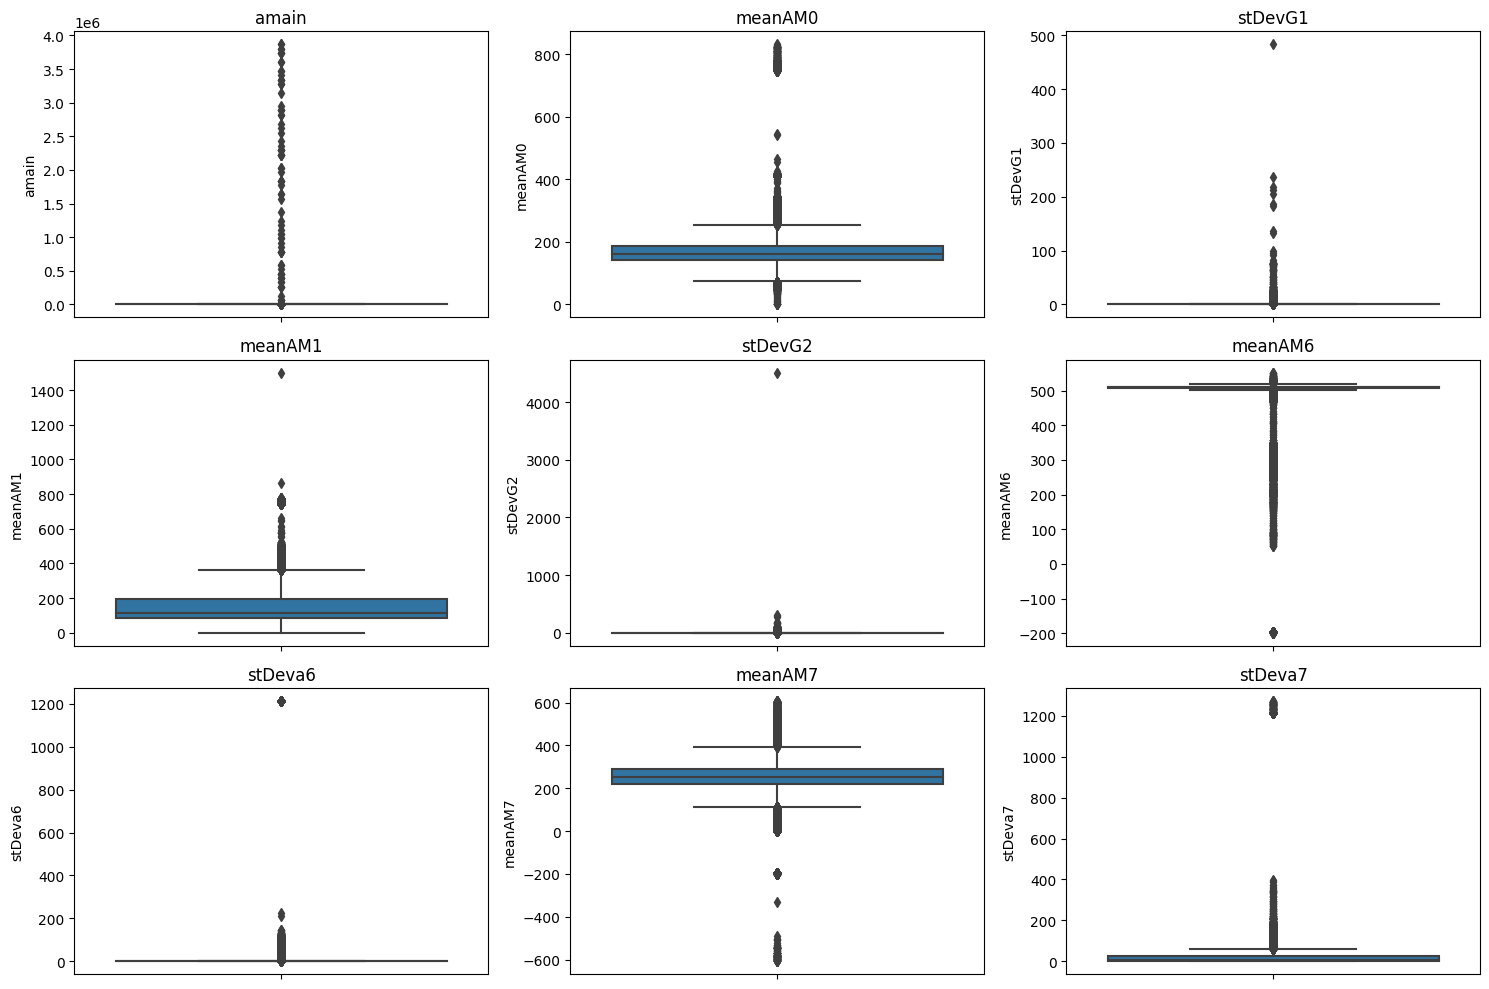

In [31]:
# Selecting a subset of columns for visualization to keep the plots readable
columns_to_plot = df.columns[1:10]  # Adjust this to visualize different columns

# Plotting box plots for selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size according to the number of columns
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


Burada yapılacak yorumlar şunlar olabilir:

1. **'amain' Sütunu**: Çok büyük aykırı değerler görülüyor, bu da veri setinde bazı değerlerin diğerlerinden çok daha büyük olduğunu gösteriyor. Bu değerlerin veri giriş hataları olup olmadığını kontrol etmek önemli olabilir.

2. **'meanAM0', 'stDevG2', 'meanAM6', 'stDeva6', 'meanAM7', 'stDeva7' Sütunları**: Bu sütunlarda da birkaç büyük aykırı değer bulunuyor. Ancak 'amain' sütununa göre daha az sayıda ve daha küçük ölçekte.

3. **Genel Gözlem**: Bazı sütunlarda aykırı değerlerin sayısı oldukça fazla görünüyor. Bu durum, ya bu değerlerin veri toplama sürecindeki doğal varyasyonlardan kaynaklandığını ya da veri setinde potansiyel hatalar veya tutarsızlıklar olduğunu düşündürebilir.

4. **Değer Aralıkları**: 'meanAM1', 'stDevG1' gibi sütunlarda geniş değer aralıkları var, bu da bu sütunlardaki verilerin geniş bir dağılıma sahip olduğunu gösteriyor.

Bu çıkarımlar, veri setini daha derinlemesine analiz etmeniz ve bu aykırı değerlerin veri setinin doğası mı yoksa veri kalitesi sorunları mı olduğunu belirlemek gerektiğini gösteriyor. Örneğin, bu aykırı değerlerin bazıları veri toplama sırasında meydana gelen geçici hatalardan kaynaklanıyor olabilir veya gerçek ve geçerli ölçümler olabilir. Aykırı değerleri doğru bir şekilde ele almak için, bu değerlerin kaynağını ve veri setinizdeki rolünü anlamak önemlidir.


In [32]:
df

,tarih,amain,meanAM0,stDevG1,meanAM1,stDevG2,meanAM6,stDeva6,meanAM7,stDeva7,mtotal,radon_real,meanTemp,stDevT,meanHum,stDevH,meanPres,stDevP,Su_motor,stDev_motor
102481,2023-08-08 11:48:59,1.001,198.001,31.221,123.001,27.081,242.001,57.351,223.001,18.731,9.001,9.001,30.311,0.981,37.421,2.471,1007.761,0.061,45.851,0.511
102482,2023-08-08 12:50:12,2.001,181.001,1.491,107.001,1.111,261.001,48.721,236.001,2.271,18.001,18.001,32.741,0.531,31.641,1.421,1007.821,0.041,45.271,0.361
22826,2023-08-08 12:53:49,1.001,306.001,60.441,150.001,31.201,511.001,0.001,288.001,20.831,190.001,190.001,38.471,1.861,28.971,3.301,1005.601,0.081,63.901,0.651
102483,2023-08-08 13:51:24,3.001,184.001,0.371,108.001,1.111,261.001,28.911,239.001,0.681,11.001,11.001,33.701,0.111,29.561,0.481,1007.821,0.051,45.321,0.401
22827,2023-08-08 13:55:03,2.001,239.001,3.301,121.001,1.071,511.001,0.001,297.001,3.501,30.001,30.001,41.201,0.151,24.391,0.371,1005.531,0.051,64.451,0.461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91750,2024-01-02 22:00:34,23.001,80.001,0.581,96.001,0.501,513.001,0.261,364.001,3.701,36.001,36.001,18.221,0.311,62.181,1.691,1005.241,0.071,66.921,0.601
91751,2024-01-02 22:00:34,1.001,79.001,0.501,95.001,0.471,513.001,0.371,338.001,33.641,37.001,37.001,17.081,0.211,68.071,0.481,1005.881,0.211,61.521,1.801
91752,2024-01-02 22:00:34,2.001,76.001,0.581,92.001,1.151,513.001,0.361,343.001,10.751,111.001,111.001,16.371,0.541,64.901,0.851,1006.561,0.171,55.851,1.461
91753,2024-01-02 22:00:34,3.001,74.001,0.471,91.001,0.501,513.001,0.371,319.001,15.951,102.001,102.001,15.071,0.231,67.261,0.661,1007.001,0.241,52.181,2.011
